Extract Data 

In [1]:

pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


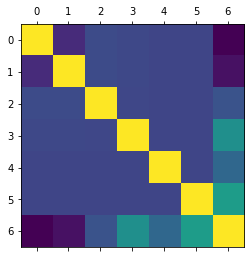

In [3]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
file = open("/content/car.data", "r")
dic = {"low":2, "med": 3, "high": 4, "vhigh":5, "5more": 5, "more": 5, "small":2, "big": 4, "unacc\n":2 , "acc\n":3, "good\n":4, "vgood\n": 5, "2":2,"3":3, "4":4}
data = []
csvfile = open("/content/out.csv","w")
csvfile2 = open("/content/out2.csv", "w")
csvwriter = csv.writer(csvfile, delimiter=",", quoting=csv.QUOTE_MINIMAL)
w2 = csv.writer(csvfile2, delimiter=",", quoting=csv.QUOTE_MINIMAL)
for lines in file.readlines():
  s = lines.split(",")
  for i in range(len(s)):
    s[i] = dic[s[i]]
  csvwriter.writerow(s)
  w2.writerow(lines)
  data.append(s)

heatmpdata = pd.read_csv("/content/out.csv")
plt.matshow(heatmpdata.corr())
plt.show()


  




[5 5 5 ... 2 2 2]
Train (1097, 6) (1097,)
Test (541, 6) (541,)
Feature 0: 15.479914
Feature 1: 0.840374
Feature 2: 0.477834
Feature 3: 1.572773
Feature 4: 1.697686
Feature 5: 128.583177


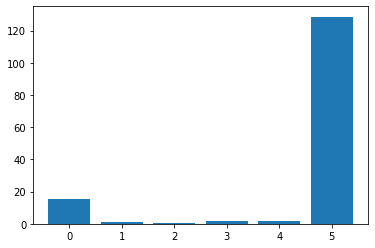

Accuracy: 30.68


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# load the dataset as a pandas DataFrame
data = pd.read_csv("/content/out.csv", header=None)
# retrieve numpy array
dataset = data.values
X = dataset[:,1:]
Y = dataset[:,0]
X.astype(str)
print(Y)

X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size=0.33, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

# prepare input data
def prepare_inputs(X_train, X_test):
 oe = OrdinalEncoder()
 oe.fit(X_train)
 X_train_enc = oe.transform(X_train)
 X_test_enc = oe.transform(X_test)
 return X_train_enc, X_test_enc

 # prepare target
def prepare_targets(y_train, y_test):
 le = LabelEncoder()
 le.fit(y_train)
 y_train_enc = le.transform(y_train)
 y_test_enc = le.transform(y_test)
 return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
 fs = SelectKBest(score_func=chi2, k='all')
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

In [5]:

# importing the libraries
import pandas as pd
import numpy as np

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.utils.data import Dataset
from torch.utils.data import Sampler
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Dropout
from torch.optim import Adam, SGD
import tensorflow as tf
from torchvision import transforms
from torchvision.transforms import *
from sklearn.utils import shuffle

datasets = pd.read_csv('out.csv')
datasets.dropna()
datasets = shuffle(datasets)


# train_set, test_set = train_test_split(datasets, test_size = 0.1)
# train_set = train_set.dropna()

# print(len(train_set))


# test_set, val_set = train_test_split(test_set, test_size = 0.5)
# test_set.dropna()
# val_set.dropna()

k_fold = 3
seg = round(1/k_fold * len(datasets))
class MyDataset(Dataset):
  
    def __init__(self, type, k):

      # # compute k_fold segments
      val_l = int(seg * k)
      val_r = int(val_l + seg)

      test_set = datasets.iloc[val_l:val_r]
      train_set = datasets
      training_set = train_set.drop(test_set.index)
      if type == "train":
        self.data = training_set
      elif type == "test":
        self.data = test_set
      # elif type == "val":
      #   self.data = val_set
      print(f'loaded data with dataset size {len(self)}')
      # print("Val left index: " + str(val_l))
      # print("Val right index: " + str(val_r))
 
      
    def __getitem__(self, idx):
        classes = 4
        # print(self.data.iloc[idx])
        # sys.stdout.flush()
        item = self.data.iloc[idx] 
        # image = []
        # for index in CORR_FEATURES:
        #   image.append(item[index])
        image = item[1:]

        label = item[0]-2
        image = torch.from_numpy(np.array(image))
        labels = []
        for i in range(classes):
            if i == label:
              labels.append(1)
            else:
              labels.append(0)
        labels = torch.IntTensor(labels)
        return image, labels

    def __len__(self):
        return len(self.data)

In [6]:
import torch.nn as nn
import torch.nn.functional as F
class Model(nn.Module):
  
  def __init__(self):
    super(Model, self).__init__()
    n_input = 6
    n_h1 = 8
    n_output = 4

    self.h1 = nn.Linear(n_input, n_h1)
    self.output = nn.Linear(n_h1, n_output)

    print(self)
  
  def forward(self, x):
    x = F.relu(self.h1(x))
    x = self.output(x)
    return x


In [ ]:

from torch import optim
from sklearn.model_selection import StratifiedKFold

confusion_matrix = [[0,0, 0,0], [0,0,0, 0], [0,0,0, 0], [0,0,0, 0]]
def accuracy_score(outputs, targets):
  sum = 0
  batch_size = targets.size(0)
  global confusion_matrix
  for i in range(batch_size):
    index_O = outputs.cpu().data.numpy()[i].argmax()
    index_T = targets.cpu().data.numpy()[i].argmax()
    confusion_matrix[index_O][index_T] = confusion_matrix[index_O][index_T] + 1

    if index_O == index_T:
      sum = sum + 1
  return sum / batch_size

def train():
  batch_size = 128
  num_epochs = 1000
  num_workers = 2

  train_score = []
  test_score = []
  for k in range(k_fold):
    print("Doing K-fold: " + str(k))
    global confusion_matrix
    model = Model()
    model = model.cuda().float()
   
    loss_fn = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(),lr = 0.01, momentum= 0.9, nesterov = True)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=1, factor=0.3, verbose=True)
    
    train_set = MyDataset("train", k)
    validation_set = MyDataset("test", k)

    train_loader = torch.utils.data.DataLoader(
          train_set, batch_size=batch_size, num_workers=num_workers, pin_memory=True, shuffle=True)
    validation_loader = torch.utils.data.DataLoader(
          validation_set, batch_size=batch_size, num_workers=num_workers, pin_memory=True, shuffle=False)

    for epoch in range(num_epochs):
      train_loss, valid_loss = [], []
      train_acc , val_acc = [], []
      # train
      model.train()

      # #quantize model
      # model.qconfig = torch.quantization.get_default_qat_qconfig('fbgemm')
      # model = torch.quantization.prepare_qat(model, inplace=True)

      for i, (data, target) in enumerate(train_loader):
          data, target = data.cuda().float(), target.cuda().float()
          # clear gradients
          optimizer.zero_grad()

          # forward prop
          prediction = model(data)

          # loss calculation
          loss = loss_fn(prediction, target)

          #backward prop
          loss.backward()

          ## weight optimization
          optimizer.step()
  
          train_loss.append(loss.item())
          train_acc.append(accuracy_score(prediction, target))

          # if i % 100 == 99:
          #         print(f'training: iteration {i} / {len(train_loader)}, avg train loss = {np.mean(train_loss):.4f}, '
          #               f'train accuracy {np.mean(train_acc):.4f}')
      
      # eval
      model.eval()
      for i, (data, target) in enumerate(validation_loader):
          data, target = data.cuda().float(), target.cuda().float()
          prediction = model(data)
          loss = loss_fn(prediction, target)
          valid_loss.append(loss.item())
          val_acc.append(accuracy_score(prediction, target))

          # if i % 100 == 99:
          #         print(f'validation: iteration {i} / {len(validation_loader)}, avg val loss = {np.mean(valid_loss):.4f}, '
          #               f'val accuracy {np.mean(val_acc):.4f}')

      # epoch summary
      print("Epoch:", epoch, "Train Loss:", np.mean(train_loss), "Train acc:", np.mean(train_acc), "Val Loss:", np.mean(valid_loss), "Val Acc:",  np.mean(val_acc), "Confusion matrix: " , confusion_matrix)
      confusion_matrix = [[0,0, 0,0], [0,0,0, 0], [0,0,0, 0], [0,0,0, 0]]
      # lr scheduler
      scheduler.step(np.mean(valid_loss))

      # # checkpoint
      # if epoch % 2 == 10:
      #     torch.save(model.state_dict(), f'ckpt_e{epoch}.pth')
      
    torch.save(model.state_dict(), 'Model' + str(k) +'.pth')
    train_score.append(np.mean(train_acc))
    test_score.append(np.mean(val_acc))



  

if __name__ == "__main__":
    train()

Doing K-fold: 0
Model(
  (h1): Linear(in_features=6, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=4, bias=True)
)
loaded data with dataset size 1473
loaded data with dataset size 164
Epoch: 0 Train Loss: 0.24614774311582246 Train acc: 0.24190705128205128 Val Loss: 0.20022907108068466 Val Acc: 0.2795138888888889 Confusion matrix:  [[177, 205, 211, 222], [7, 11, 3, 6], [99, 121, 119, 106], [59, 95, 99, 97]]
Epoch: 1 Train Loss: 0.19480432073275247 Train acc: 0.2814803685897436 Val Loss: 0.1941969096660614 Val Acc: 0.2361111111111111 Confusion matrix:  [[3, 0, 1, 1], [86, 87, 71, 65], [51, 69, 66, 69], [202, 276, 294, 296]]
Epoch: 2 Train Loss: 0.18909197797377905 Train acc: 0.28412459935897433 Val Loss: 0.19009534269571304 Val Acc: 0.2248263888888889 Confusion matrix:  [[0, 0, 0, 0], [71, 90, 76, 74], [113, 107, 93, 90], [158, 235, 263, 267]]
Epoch: 3 Train Loss: 0.18791450187563896 Train acc: 0.2769030448717949 Val Loss: 0.18967150151729584 Val Acc: 0.228732

Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd333021310>
<function _MultiProcessingDataLoaderIter.__del__ at 0x7fd333021310>
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
        self._shutdown_workers()self._shutdown_workers()

  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
        if w.is_alive():
if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in 

Epoch: 65 Train Loss: 0.17715765039126077 Train acc: 0.3452423878205128 Val Loss: 0.17666050791740417 Val Acc: 0.3081597222222222 Confusion matrix:  [[97, 74, 50, 42], [80, 116, 50, 36], [84, 88, 94, 91], [81, 154, 238, 262]]
Epoch 00066: reducing learning rate of group 0 to 5.9049e-08.


Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd333021310>
<function _MultiProcessingDataLoaderIter.__del__ at 0x7fd333021310>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
Traceback (most recent call last):
      File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
self._shutdown_workers()    self._shutdown_workers()

  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
        if w.is_alive():
if w.is_alive():  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process

  File "/usr/lib/pytho

Epoch: 66 Train Loss: 0.17703679576516151 Train acc: 0.3452423878205128 Val Loss: 0.17666050791740417 Val Acc: 0.3081597222222222 Confusion matrix:  [[97, 74, 50, 42], [80, 116, 50, 36], [84, 88, 94, 91], [81, 154, 238, 262]]


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd333021310>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7fd333021310>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
        self._shutdown_workers()if w.is_alive():

  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError  File "/usr/lib/python3.9/multiprocessing/process.py"

Epoch: 67 Train Loss: 0.1771551432708899 Train acc: 0.3452423878205128 Val Loss: 0.17666050791740417 Val Acc: 0.3081597222222222 Confusion matrix:  [[97, 74, 50, 42], [80, 116, 50, 36], [84, 88, 94, 91], [81, 154, 238, 262]]
Epoch 00068: reducing learning rate of group 0 to 1.7715e-08.


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd333021310>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd333021310>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch: 68 Train Loss: 0.17699557294448218 Train acc: 0.34145633012820514 Val Loss: 0.17666050791740417 Val Acc: 0.3081597222222222 Confusion matrix:  [[97, 74, 50, 42], [80, 116, 50, 36], [84, 88, 94, 91], [81, 154, 238, 262]]
Epoch: 69 Train Loss: 0.17702181388934454 Train acc: 0.34145633012820514 Val Loss: 0.17666051536798477 Val Acc: 0.3081597222222222 Confusion matrix:  [[97, 74, 50, 42], [80, 116, 50, 36], [84, 88, 94, 91], [81, 154, 238, 262]]
Epoch 00070: reducing learning rate of group 0 to 5.3144e-09.
Epoch: 70 Train Loss: 0.17715006694197655 Train acc: 0.3408253205128205 Val Loss: 0.17666051536798477 Val Acc: 0.3081597222222222 Confusion matrix:  [[97, 74, 50, 42], [80, 116, 50, 36], [84, 88, 94, 91], [81, 154, 238, 262]]
Epoch: 71 Train Loss: 0.17699019238352776 Train acc: 0.34398036858974357 Val Loss: 0.17666051536798477 Val Acc: 0.3081597222222222 Confusion matrix:  [[97, 74, 50, 42], [80, 116, 50, 36], [84, 88, 94, 91], [81, 154, 238, 262]]
Epoch: 72 Train Loss: 0.1768198

Exception ignored in: Exception ignored in: <function _releaseLock at 0x7fd401077c10>
Traceback (most recent call last):
  File "/usr/lib/python3.9/logging/__init__.py", line 227, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 
<function _after_fork at 0x7fd401154e50>